## Wine Classification using Neural Networks
    Auteur : Thierry SANDOZ and Stephen MONNET                        
    Date : 10.06.2020 

In [1]:
from sys import path
path.append('functions')
from WineClassificationLib import *

from random import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# PCA (principal component analysis)
from sklearn.decomposition import PCA

## Optimizing a function
import scipy.optimize as opt
import scipy.io
# Normalization 
from sklearn import preprocessing

# Data separation 
from sklearn.model_selection import train_test_split

## Data Loading

Les données sont chargées dans la variable dataWine et réparties selon leur nature (densité, pH, quality, etc..)

In [2]:
dataWine = pd.read_csv("data/winequality-white.csv", sep=';')

## Diplay the first five row of the datas
display(dataWine.head(n=5))

## Number of data
nb_data = len(dataWine)
print("Nombre de données : {}".format(nb_data))

## Separation of the data
fixAcid     = dataWine['fixed acidity']
volAcid     = dataWine['volatile acidity']
citAcid     = dataWine['citric acid']
resSugar    = dataWine['residual sugar']
chlor       = dataWine['chlorides']
freeSulfDio = dataWine['free sulfur dioxide']
totSulDio   = dataWine['total sulfur dioxide']
density     = dataWine['density']
pH          = dataWine['pH']
sulph       = dataWine['sulphates']
alc         = dataWine['alcohol']
quality     = dataWine['quality']

# Affichage des notes minimales et maximales attribuées
print("Note minimale : {}".format(min(quality)))
print("Note maximale : {}".format(max(quality)))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Nombre de données : 4898
Note minimale : 3
Note maximale : 9


## Change of quality rating

Puisqu'il y a très peu (voir pas) de données dans les notes extrêmes, on regroupe les notes de 1-4, de 5-6 et de 7-10 afin d'obtenir trois classes plus équilibrées. On passe d'une notation entre 0 - 9 à une notation entre 0 - 2.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_categorical
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2


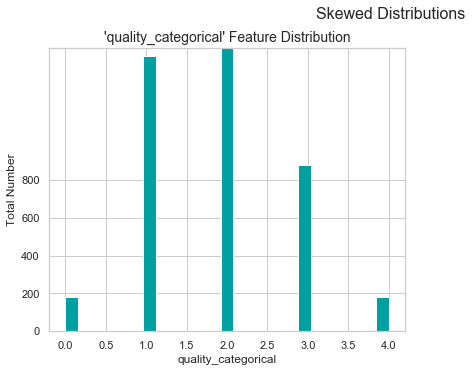

In [3]:
# Defining the splits for categories. 1–4 will be poor quality, 5–6 will be average, 7–10 will be great
bins = [3,4,5,6,7,9]
# 0 for low quality, 1 for average, 2 for great quality
quality_labels=[0,1,2,3,4]
dataWine['quality_categorical'] = pd.cut(dataWine['quality'], bins=bins, labels=quality_labels, include_lowest=True)

#Displays the first 2 columns
display(dataWine.head(n=5))

# Split the data into features and target label
quality_raw = dataWine['quality_categorical']
features_raw = dataWine.drop(['quality', 'quality_categorical'], axis = 1)

# Display the quality distribution
distribution(dataWine, 'quality_categorical')

## Normalization

Normalisation des données dans une plage comprise entre 0 et 1.

In [4]:
## Normalize the features between 0 and 1
x = dataWine.values #returns a numpy array

# Registering quality before normalization
quality = dataWine['quality']
quality_categorical = dataWine['quality_categorical']

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dataWine = pd.DataFrame(x_scaled, columns=dataWine.columns)

# Avoid quality normalization
dataWine['quality'] = quality
dataWine['quality_categorical'] = quality_categorical

## Diplay the first five row of the datas
display(dataWine.head(n=5))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_categorical
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032,6,2
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935,6,2
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710,6,2
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,6,2
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,6,2


## Removing the outliers
Certaines données du dataset présentent des valeurs extrêmes qui sont trop éloignées du cas général. Une prédiction correcte de ces cas nécessiterait un overfitting qui serait néfaste pour la précision de l'algorithme. L'objectif ici est de supprimer ces données jugées abberantes.

In [5]:
# For each feature find the data points with extreme high or low values
outliers = []
features_raw = dataWine.drop(['quality', 'quality_categorical'], axis = 1)
quality_raw = dataWine['quality_categorical']

for feature in features_raw.keys():

    Q1 = np.percentile(features_raw[feature], q=25)

    Q3 = np.percentile(features_raw[feature], q=75)
    
    interquartile_range = Q3 - Q1
    step = 1.5 * interquartile_range
    
    #print("Data points considered outliers for the feature '{}':".format(feature))
    #display(dataWine[~((dataWine[feature] >= Q1 - step) & (dataWine[feature] <= Q3 + step))])

    outliers = outliers + list(features_raw[~((features_raw[feature] >= Q1 - step) & (features_raw[feature] <= Q3 + step))].index)
    
    # Remove the outliers, if any were specified
    good_data = features_raw.drop(features_raw.index[outliers]).reset_index(drop = True)
    good_quality = quality_raw.drop(quality_raw.index[outliers]).reset_index(drop = True)
    
print("Nb data before removing the outliers :", len(dataWine))
print("Nb data after removing the outliers :", len(good_data))

Nb data before removing the outliers : 4898
Nb data after removing the outliers : 4009


## Set Separation
Séparation du set de données en trois sets : Training set (60%), Cross-Validation set (20%) et Test set (20%).

In [6]:
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(good_data, 
 good_quality, test_size = 0.4, shuffle = False)

# Split the training set into training set and CV set
X_cv, X_test, y_cv, y_test = train_test_split(X_test, y_test, test_size = 0.5, shuffle = False)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]), "which represents {}% of the set".format(round(100*X_train.shape[0]/(good_data.shape[0]),1)))
print("Cross-Validation set has {} samples".format(X_cv.shape[0]), "which represents {}% of the set".format(round(100*X_cv.shape[0]/(good_data.shape[0]),1)))
print("Testing set has {} samples.".format(X_test.shape[0]), "which represents {}% of the set".format(round(100*X_test.shape[0]/(good_data.shape[0]),1)))


Training set has 2405 samples. which represents 60.0% of the set
Cross-Validation set has 802 samples which represents 20.0% of the set
Testing set has 802 samples. which represents 20.0% of the set


## General Neural Networks features
Déclaration des caractéristiques du réseau de neurones : Nombre de couche cachée et leur taille, nombre de neurones d'entrée et de sortie. 

In [7]:
# number of hidden layers
nb_hidden_layers = 1

# number of neurones in the hidden layer
nb_hidden_neurones = 5

# number of input neurones
nb_input_neurones = dataWine.shape[1]-2 # corresponds to the input parameters number

# number of output neurones
nb_output_neurones = len(quality_labels) # corresponds to the class number


## Random initialization of parameters \theta
Les paramètres Theta1, Theta2 sont initialisé aléatoirement.

In [8]:
# Two matrix of theta correspondig to three layers
Theta1 = np.random.rand(nb_hidden_neurones, nb_input_neurones+1)
Theta2 = np.random.rand(nb_output_neurones, nb_hidden_neurones+1)

epsilon_init = 0.12

Theta1 = Theta1*(2*epsilon_init) - epsilon_init
Theta2 = Theta2*(2*epsilon_init) - epsilon_init

# Concatenate Theta1 and Theta2 into one variable "nn_params"
nn_params = np.concatenate((Theta1.reshape(Theta1.size, order='F'), Theta2.reshape(Theta2.size, order='F')))

## Choosing Lambda

0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9


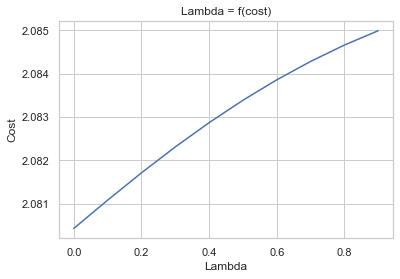

In [9]:
# Initialization of Lambda
Lambda = 0

# Min and max value of tested Lambda
Lambda_min = 0
Lambda_max = 1

# Step between every test
step = 0.1

# Initialisation of the cost variable
J_learn_Lambda = np.zeros([int((Lambda_max-Lambda_min)/step),1])

# Number of iterations in the optimization function for every Lambda
nb_iter = 30

for i in np.arange(Lambda_min, Lambda_max, step):
    # Compute the cost function nb_iter times for one value of Lambda
    J_learn, _ = nnGradientDescent(nn_params, nb_input_neurones, nb_hidden_neurones, nb_output_neurones, X_train, y_train, i, nb_iter)
    # Get the min value of the cost function computed for one value of Lambda
    J_learn_Lambda[int(i/step)] = min(J_learn)
    
# Displaying cost function = f(Lambda)
plt.plot(np.arange(Lambda_min, Lambda_max, step),J_learn_Lambda)
plt.xlabel("Lambda")
plt.ylabel("Cost")
plt.title("Lambda = f(cost)")
plt.show()

# Choosing the optimal value for Lambda 
Lambda = 0.3

## Learning Curve
Calcul est affichage de la fonction de coût en fonction du nombre d'itérations réalisées par l'algorithme d'optimisation.

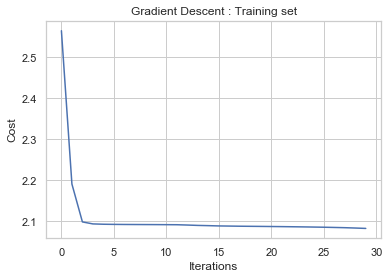

In [10]:
# Compute the cost function for every iteration, return nn_params which contains Theta1 and Theta2
J_learn_train, nn_params = nnGradientDescent(nn_params, nb_input_neurones, nb_hidden_neurones, \
    nb_output_neurones, X_train, y_train, Lambda, 30)

# Display the learning curve for the training set 
plt.plot(range(0,len(J_learn_train),1),J_learn_train)
plt.title("Gradient Descent : Training set")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

## Prediction - C-V set
Prédiction des notes attribuées par le réseau de neurones sur le Cross-Validation set.

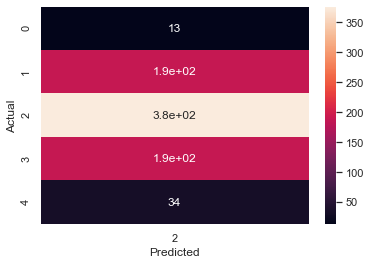

Cross-Validation accuracy: 46.88279301745636%


In [11]:
# Reshape nn_params into Theta1 and Theta2
Theta1 = np.reshape(nn_params[:nb_hidden_neurones * (nb_input_neurones + 1)], (nb_hidden_neurones, nb_input_neurones + 1), order='F')
Theta2 = np.reshape(nn_params[nb_hidden_neurones * (nb_input_neurones + 1):], (nb_output_neurones, nb_hidden_neurones + 1), order='F')

# Prediction for c-v set
pred_cv_set = predict(Theta1, Theta2, X_cv)

# Display the confusion matrix for c-v set
confusion_matrix_cv = pd.crosstab(y_cv, pred_cv_set, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix_cv, annot=True)
plt.show()

# Accuracy for c-v set
print("Cross-Validation accuracy:", str(100 * np.mean(pred_cv_set == y_cv)) + "%")

## Training neural network
Entrainement du réseau de neurones avec les paramètres choisis précédemment.

In [12]:
# Choosing the number of iterations
nb_iter = 30

# random initialisation of parameters Theta1 and Theta2
Theta1 = np.random.rand(nb_hidden_neurones, nb_input_neurones+1)
Theta2 = np.random.rand(nb_output_neurones, nb_hidden_neurones+1)

# Choosing the max random value
epsilon_init = 0.12

Theta1 = Theta1*(2*epsilon_init) - epsilon_init
Theta2 = Theta2*(2*epsilon_init) - epsilon_init

# Concatenate Theta1 and Theta2 into nn_params
nn_params = np.concatenate((Theta1.reshape(Theta1.size, order='F'), Theta2.reshape(Theta2.size, order='F')))

# Arguments of the optimization function
arguments = (nb_input_neurones , nb_hidden_neurones, nb_output_neurones, X_train, y_train, Lambda)

# Neural Network training
res = opt.minimize(nnCostFunction, x0=nn_params, args=arguments, method="L-BFGS-B", options={'maxiter':nb_iter, 'disp':True}, jac=True)

# Get Theta1 and Theta2 from nn_params after training
nn_params = res['x']

Theta1 = np.reshape(nn_params[:nb_hidden_neurones * (nb_input_neurones + 1)], (nb_hidden_neurones, nb_input_neurones + 1), order='F')
Theta2 = np.reshape(nn_params[nb_hidden_neurones * (nb_input_neurones + 1):], (nb_output_neurones, nb_hidden_neurones + 1), order='F')

## Prediction - Test set

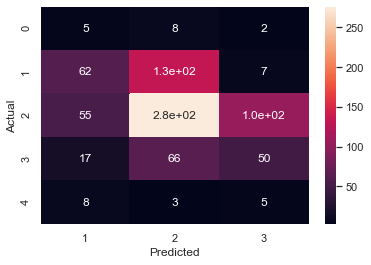

Test set accuracy : 48.37905236907731%


In [13]:
# Prediction for the test set
pred_test_set = predict(Theta1, Theta2, X_test)

# Display the confusion matrix for the test set
confusion_matrix_test = pd.crosstab(y_test, pred_test_set, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix_test, annot=True)
plt.show()

# Display the test set accuracy
print("Test set accuracy :", str(100 * np.mean(pred_test_set == y_test)) + "%")